# Ch.6 SQL 기본

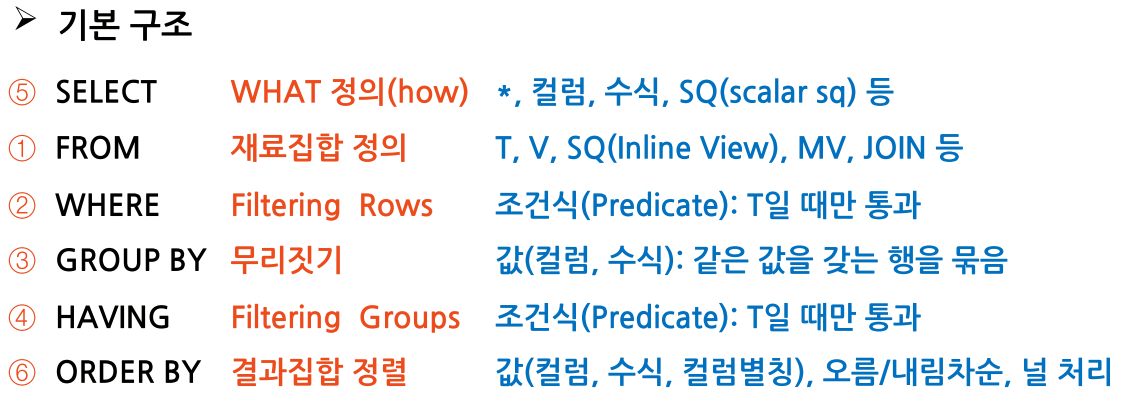

In [1]:
from IPython.display import Image
import os
os.chdir(r"C:\Users\ChangHo Kim\Desktop\이미지")
Image("구문.png")

### 참고
- "*" : 모든 컬럼을 의미
- T : table , V : View, MV : Material View로 오라클에서 사용
- 숫자의 의미는 각 명령어가 내포하는 관계 (사용 가능 여부) 나타내는 것임

### Ch.6.1 Select문 : 값(rows)을 retrieve하기 위해서 사용
### 1. Null (Absence of Value): 값의 부재
- Inapplicable, Unassignable, Unavailable, Unknown
- NA (Not Applicable)), NaN (Not a Number)
- 산술 연산 불가능 (어떤 계산이든 결과는 무조건 **Null**)
- 비교 연산 불가능 (IS NULL, IN 연산자 이외에는 무조건 **NULL**)

### 2. 3치 논리 (3-Valued logic)
- SQL에서 논리 값은 3가지임 (T, F, N)
- SQL의 논리 연산 :
    - AND 연산: 두 값이 모두 T → T / 하나라도 F → F
    - OR 연산: 두 값이 모두 F → F / 하나라도 T → T

### 3. SQL의 조건(Condition)
- Predicate: 조건의 결과가 T ⇒ 허용(통과) / F, N ⇒ 거부(탈락)
- Constraint: 조건의 결과가 T, N ⇒ 허용(통과) ⇒ F만 아니면 허용 / F ⇒ 거부(탈락)

### 4. 열 이름의 별칭 (Column Aliases)

### 5. 데이터베이스 개체의 이름 규칙(Naming Rule) / (컬럼명, 별칭 다 포함)
- 알파벳 및 숫자, $, _ 는 사용 가능 / 예약어 불가능 (SELECT...)
- 64자로 제한
- 공백은 가능하지만 백틱으로 묶어주어야 함
- 저장은 소문자되며, 리눅스에서는 모두 소문자로 사용해야함


select concat(concat(first_name, ' '), last_name) as name, hire_date
from employees.employees
limit 20;



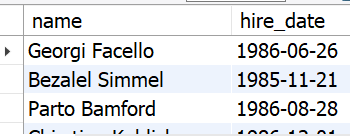

In [6]:
### AS (출력되는 결과 집합 name(공백은 불가능) 수정, 생략해도 무방)
print("""
select concat(concat(first_name, ' '), last_name) as name, hire_date
from employees.employees
limit 20;
""")
# 이미지와 같이 name이 바뀐 것을 확인 가능
Image("as.png")

### 6. 실습 진행 (p.194~199)
- 데이터베이스 입력하기

### 7. 특정한 조건의 데이터만 조회하는 <SELECT ... FROM ... WHERE>
- AND, OR, BETWEEN ... AND ...등이 있음
- 숫자, 문자열 비교도 가능
- IN 을 이용해 연속적이지 않은 값도 조회 가능
- LIKE 연산자를 통해 문자열 검색이 가능 (% : 그 뒤에 어느 것이든 허용 / _ : 앞 글자수 표기용)
- Any, Some, All : some 과 any는 동일한 의미로 사용 되며 (하나만 만족해도 가능) / all의 경우, 전부 만족해야 할 것!


### 8. 서브쿼리 : 쿼리문 안에 쿼리문이 들어 있는 것을 의미
- 서브 쿼리 종류 (* 실행순서에 따라)
  - 중첩서브쿼리(Nested SQ)
    - 서브쿼리가 먼저 수행 
    - 서브쿼리의 실행 결과를 메인 쿼리에서 활용 ⇒ 서브쿼리는 단 한 번만 실행
<br>
  - 상호관련서브쿼리(상관서브쿼리, Correlated SQ)
    - 메인쿼리에서 후보행 선택
    - 서브쿼리에서 후보행의 데이터를 이용하여 실행
    - 서브쿼리의 실행 결과를 메인 쿼리에서 활용 ⇒ 서브쿼리가 후보행 개수만큼 실행
<br>
- 중첩서브쿼리와 상호관련서브쿼리의 구별 ⇒ 서브쿼리의 WHERE 절에 조인조건이 있으면 상호관련서브쿼리
  - 조인 조건여부 판별 방법 ⇒ 서브쿼리의 WHERE 절에서 내부 테이블과 외부테이블이 비교되는 경우

In [12]:
# buytbl과 usertbl 비교 되므로 상호관련 서브쿼리로 분류 가능
print("""
select name, userID from usertbl 
where userID IN (select userID from buytbl where prodName = '청바지');
""")


select name, userID from usertbl 
where userID IN (select userID from buytbl where prodName = '청바지');



- 단일행 서브쿼리 vs. 다중행 서브쿼리
- 단일 컬럼 서브쿼리 vs. 다중 컬럼 서브쿼리
- 스칼라 서브쿼리
- 인라인 뷰



select userID, name
from usertbl
where birthYear >= 1970 and height >= 182;



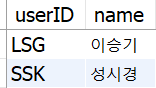

In [7]:
print("""
select userID, name
from usertbl
where birthYear >= 1970 and height >= 182;
""")
Image('where.png')


select userID, name
from usertbl
where addr IN ('경기', '서울');



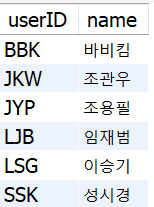

In [9]:
print("""
select userID, name
from usertbl
where addr IN ('경기', '서울');
""")
Image('wherein.png')


select name, height
from usertbl
where name like '__기';



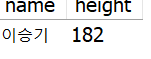

In [10]:
print("""
select name, height
from usertbl
where name like '__기';
""")
Image('wherelike.png')


select name, height from usertbl
where height >= some(select height from usertbl where addr = '서울');



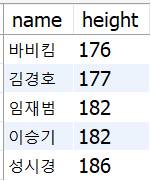

In [2]:
# Some / Any / All
print("""
select name, height from usertbl
where height >= some(select height from usertbl where addr = '서울');
""")
Image('wheresome.png')

### 9. 각 활용 용어
- Order by : 오름/내림차순, 정렬 기준이 여러개면 콤마로 구분하며 정수는 position in select-list를 의미
- distinct : Category에서 중복을 제외하고 나타냄
- Limit : 출력의 갯수 제한 / offset을 활용해 특정 수 이후 부터 자료 출력
- Create table ... select : 테이블 복사 (제약 조건이나 PK등은 복사 불가능함)


select userID, name from usertbl
order by mDate;



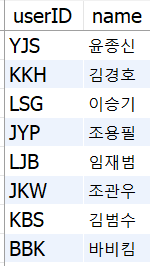

In [3]:
print("""
select userID, name from usertbl
order by mDate;
""")
Image('orderby.png')


select * from usertbl
order by mobile1 is null, mobile1;



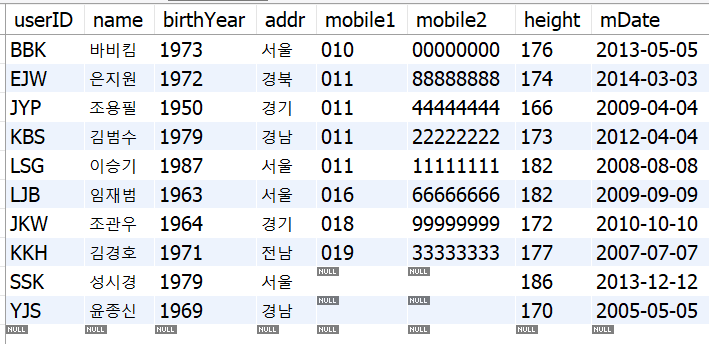

In [5]:
# null 값 뒤로 빼기
print("""
select * from usertbl
order by mobile1 is null, mobile1;
""")
Image('orderbynull.png')


select * from employees
order by emp_no
limit 3 offset 100;



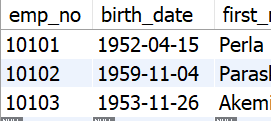

In [7]:
print("""
select * from employees
order by emp_no
limit 3 offset 100;
""")
Image('limit.png')

In [8]:
# 복사 (단, PK나 제약 조건등은 복사가 불가능 / as 생략 가능)
print("""
create table buytbl2
	(as) select *
		from buytbl;
""")

# 기존 테이블의 구조만 가져오는 방법 (항상 where절 거짓으로 만들기)
print("""
create table buytbl2
	select *
		from buytbl
		where 1 = 2;
""")

# 테이블 새로운 열 추가 
print("""
create table usertbl3 (age INT default 10, gender CHAR(1) default '중')
	select name as full_name, height, addr as habitat
    from usertbl;
select * from usertbl3;
""")


create table buytbl2
	(as) select *
		from buytbl;


create table buytbl2
	select *
		from buytbl
		where 1 = 2;


create table usertbl3 (age INT default 10, gender CHAR(1) default '중')
	select name as full_name, height, addr as habitat
    from usertbl;
select * from usertbl3;



### 10. GROUP BY 및 HAVING 그리고 집계 함수
- 집계 함수(Aggregate function, Group function, Multiple-Row function)
- 여러 데이터를 모아서 한 건 반환(a result per group) <-> 단일행 함수 (a result per row)
- 계산 시에 NULL 값은 무시하고 계산 (예외: COUNT(*))


CREATE TABLE test
    SELECT 1000 AS col1
    UNION ALL SELECT 2000
    UNION ALL SELECT NULL
    UNION ALL SELECT NULL
    UNION ALL SELECT 2000
    UNION ALL SELECT 1000;
    
SELECT * FROM test;
select sum(col1), avg(col1), count(*) from test;



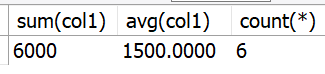

In [11]:
print("""
CREATE TABLE test
    SELECT 1000 AS col1
    UNION ALL SELECT 2000
    UNION ALL SELECT NULL
    UNION ALL SELECT NULL
    UNION ALL SELECT 2000
    UNION ALL SELECT 1000;
    
SELECT * FROM test;
select sum(col1), avg(col1), count(*) from test;
""")
Image('집계함수.png')


select userID, sum(price * amount) as '총구매액'
from buytbl
group by userID
having sum(price*amount) > 1000
order by 2 desc;



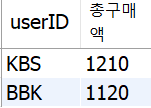

In [13]:
# Having (where절을 쓸 수 없을 때 사용)
print("""
select userID, sum(price * amount) as '총구매액'
from buytbl
group by userID
having sum(price*amount) > 1000
order by 2 desc;
""")
Image('having.png')


select groupName, prodName, SUM(price*amount) as '총 구매액', count(*) '판매건수'
from buytbl
group by groupName, prodName with rollup;



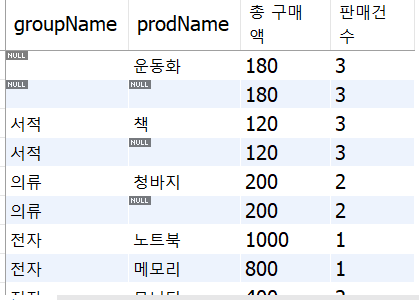

In [15]:
# Roll up : 중간 합계를 나타냄
print("""
select groupName, prodName, SUM(price*amount) as '총 구매액', count(*) '판매건수'
from buytbl
group by groupName, prodName with rollup;
""")
Image('rollup.png')

## Ch.6.2 데이터의 변경을 위한 SQL 문
### 0. Insert, Update, Delete
### 1. 대용량의 테이블 삭제

- 1) DELETE FROM        시간 : 삭제양이 많을 수록 시간이 오래 걸림 / 테이블 유지 : O
- 2) DROP TABLE         시간 : 빨리 / 테이블 유지 : X
- 3) TRUNCATE TABLE     시간 : 빨리 / 테이블 유지 : O
